# Investigating pulse duration and arrival parameter errors

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
# Load dataset
df_tt = pd.read_csv("/Users/dven/repos/Pulse_Duration_Calibration/data/output/cme_transit_time.csv",header=None)
df_av = pd.read_csv("/Users/dven/repos/Pulse_Duration_Calibration/data/output/cme_arrival_speed.csv",header=None)

# Rename first column by rounding its values (excluding the header row)
df_tt.iloc[1:, 0] = df_tt.iloc[1:, 0].str.extract(r'([\d\.]+)').astype(float).round(1)
df_av.iloc[1:, 0] = df_av.iloc[1:, 0].str.extract(r'([\d\.]+)').astype(float).round(1)

In [68]:
# Extract pulse duration values (rows) and CME transit time data (columns)
tt = df_tt.iloc[1:,1:]
tt_obs = df_tt.iloc[0, 1:]
pulse_durations = df_tt.iloc[1:, 0]

tt_error = (tt - tt_obs).abs()
tt_notabs = (tt - tt_obs)
tt_error = tt_error.apply(pd.to_numeric, errors='coerce')
tt_notabs = tt_notabs.apply(pd.to_numeric, errors='coerce')

tt_mae = tt_error.mean(axis=1)
tt_median = tt_error.median(axis=1)
tt_firstq = tt_error.quantile(q=0.25,axis=1)
tt_thirdq = tt_error.quantile(q=0.75,axis=1)

RangeIndex(start=1, stop=181, step=1)

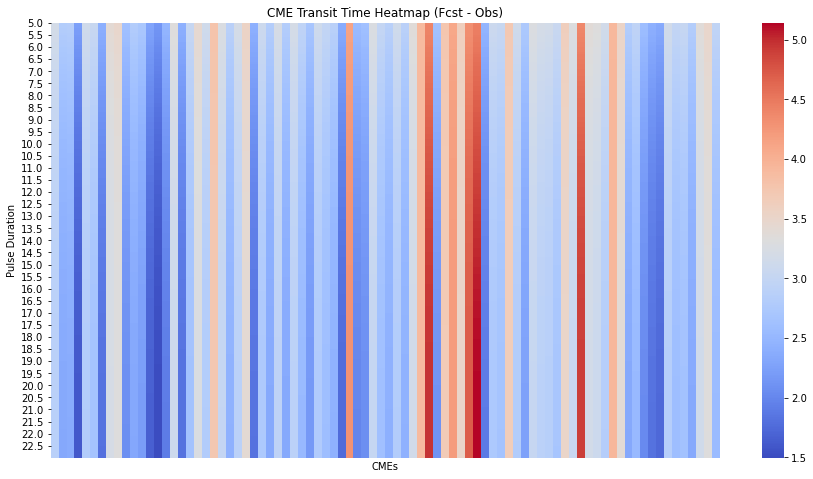

In [4]:
# Set up heatmap
plt.figure(figsize=(15, 8))
ax = sns.heatmap(tt, cmap="coolwarm", xticklabels=False, yticklabels=False, cbar=True)

# Set y-tick positions and labels every 5 intervals
ytick_positions = np.arange(0, len(pulse_durations), 5)
ax.set_yticks(ytick_positions)
ax.set_yticklabels(pulse_durations.iloc[ytick_positions])

# Labels and title
plt.xlabel("CMEs")  # Assuming columns represent different CMEs
plt.ylabel("Pulse Duration")
plt.title("CME Transit Time Heatmap (Fcst - Obs)")

# Show plot
plt.savefig("tt_heatmap.pdf")
plt.show()

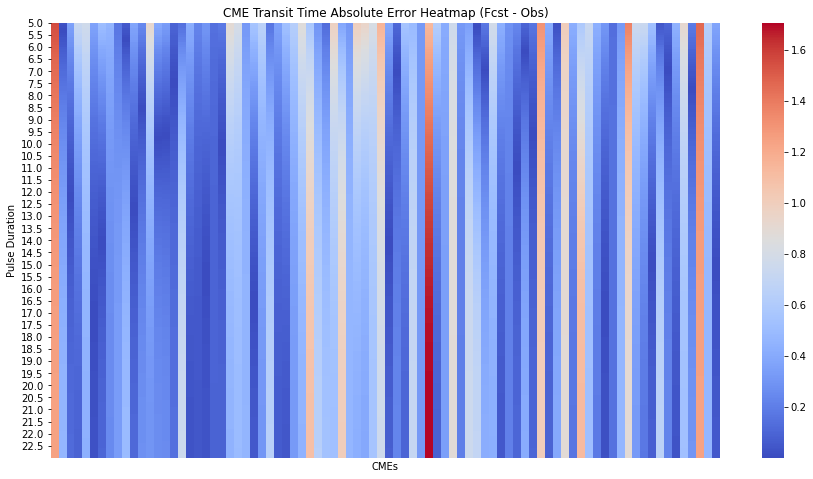

In [5]:
# Set up heatmap
plt.figure(figsize=(15, 8))
ax = sns.heatmap(tt_error, cmap="coolwarm", xticklabels=False, yticklabels=False, cbar=True)

# Set y-tick positions and labels every 5 intervals
ytick_positions = np.arange(0, len(pulse_durations), 5)
ax.set_yticks(ytick_positions)
ax.set_yticklabels(pulse_durations.iloc[ytick_positions])

# Labels and title
plt.xlabel("CMEs")
plt.ylabel("Pulse Duration")
plt.title("CME Transit Time Absolute Error Heatmap (Fcst - Obs)")

# Show plot
plt.savefig("tt_abs_error_heatmap.pdf")
plt.show()

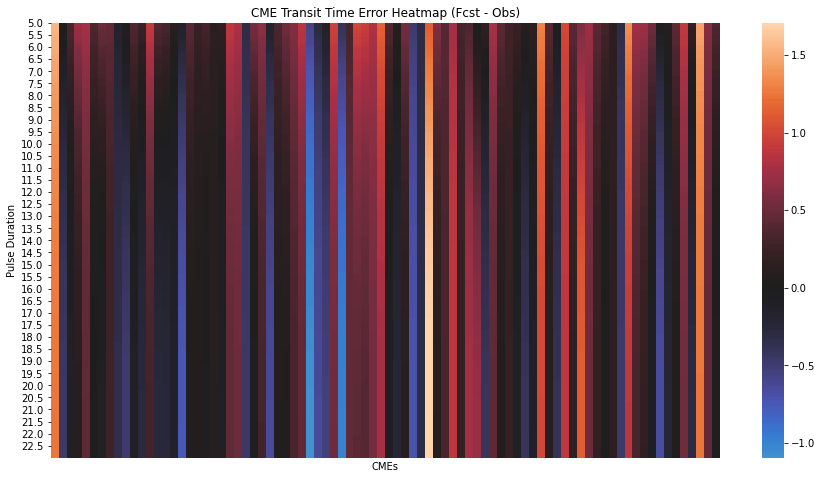

In [6]:
# Set up heatmap
plt.figure(figsize=(15, 8))
ax = sns.heatmap(tt_notabs, center=0, xticklabels=False, yticklabels=False, cbar=True)

# Set y-tick positions and labels every 5 intervals
ytick_positions = np.arange(0, len(pulse_durations), 5)
ax.set_yticks(ytick_positions)
ax.set_yticklabels(pulse_durations.iloc[ytick_positions])

# Labels and title
plt.xlabel("CMEs")
plt.ylabel("Pulse Duration")
plt.title("CME Transit Time Error Heatmap (Fcst - Obs)")

# Show plot
plt.savefig("tt_error_heatmap.pdf")
plt.show()

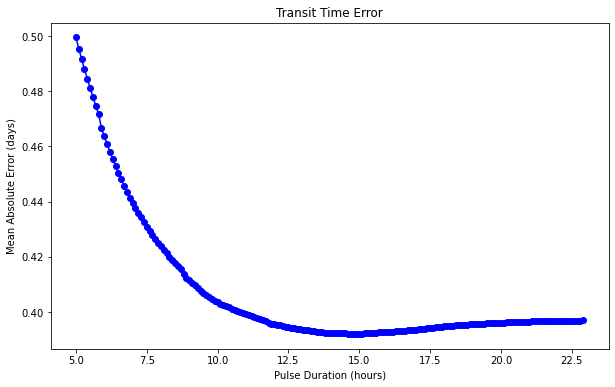

In [7]:
# Plot df_error_avg against pulse_durations
plt.figure(figsize=(10, 6))
plt.plot(pulse_durations, tt_mae, marker='o', linestyle='-', color='b')

# Labels and title
plt.xlabel('Pulse Duration (hours)')
plt.ylabel('Mean Absolute Error (days)')
plt.title('Transit Time Error')

# Show the plot
plt.savefig('tt_mae.pdf', format='pdf')
plt.show()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

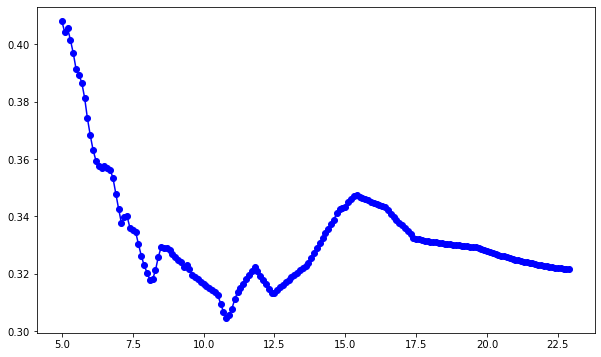

In [56]:
# Plot median values as the main line
plt.figure(figsize=(10, 6))
plt.plot(pulse_durations, tt_median, marker='o', linestyle='-', color='b', label='Median')

# Fill the area between Q1 (first quartile) and Q3 (third quartile)
plt.fill_between(pulse_durations, tt_firstq, tt_thirdq, color='b', alpha=0.2, label='IQR')

# Add mae for comparison
plt.plot(pulse_durations, tt_mae, marker='o', linestyle='-', color='red', label='Mean')

# Labels and title
plt.xlabel('Pulse Duration (hours)')
plt.ylabel('Absolute Error (days)')
plt.title('Transit Time Error')

# Add a legend
plt.legend()

# Save the plot
plt.savefig('tt_median_iqr.pdf', format='pdf')

In [9]:
# Repeat for arrival speed
av = df_av.iloc[1:,1:]
av_obs = df_av.iloc[0, 1:]
pulse_durations = df_av.iloc[1:, 0]

av_error = (av - av_obs).abs()
av_notabs = (av - av_obs)
av_error = av_error.apply(pd.to_numeric, errors='coerce')
av_notabs = av_notabs.apply(pd.to_numeric, errors='coerce')

av_mae = av_error.mean(axis=1)
av_median = av_error.median(axis=1)
av_firstq = av_error.quantile(q=0.25,axis=1)
av_thirdq = av_error.quantile(q=0.75,axis=1)

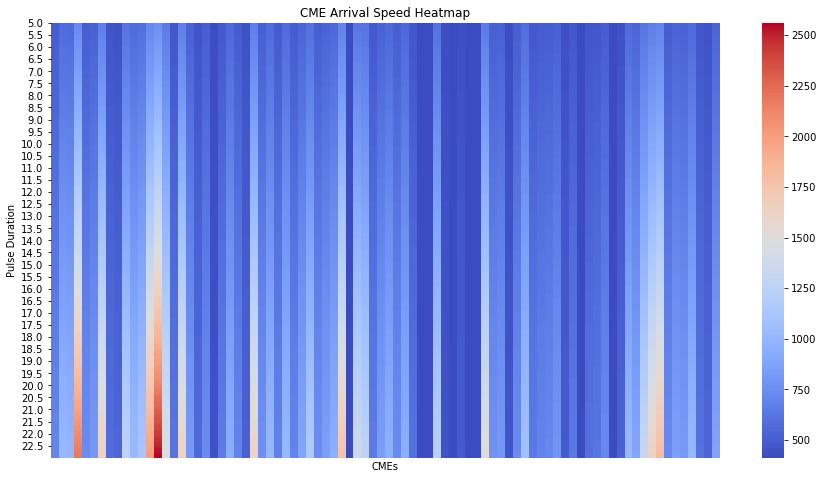

In [10]:
# Set up heatmap
plt.figure(figsize=(15, 8))
ax = sns.heatmap(av, cmap="coolwarm", xticklabels=False, yticklabels=False, cbar=True)

# Set y-tick positions and labels every 5 intervals
ytick_positions = np.arange(0, len(pulse_durations), 5)
ax.set_yticks(ytick_positions)
ax.set_yticklabels(pulse_durations.iloc[ytick_positions])

# Labels and title
plt.xlabel("CMEs")  # Assuming columns represent different CMEs
plt.ylabel("Pulse Duration")
plt.title("CME Arrival Speed Heatmap")

# Show plot
plt.savefig("as_heatmap.pdf")
plt.show()

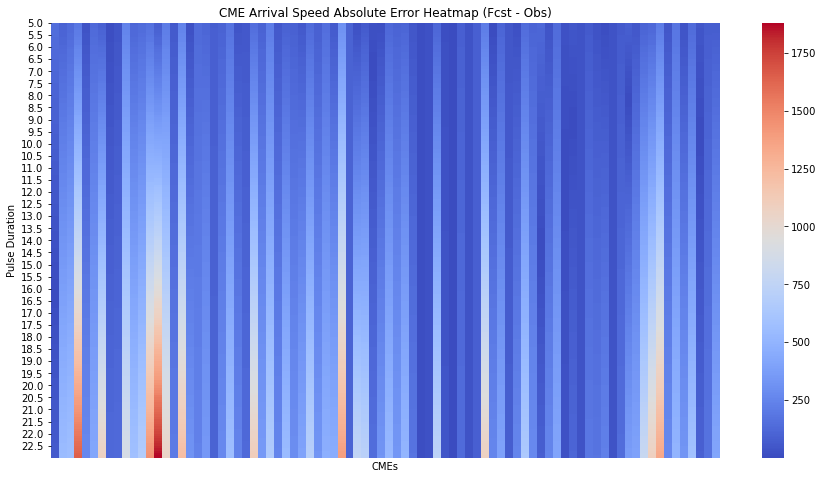

In [11]:
# Set up heatmap
plt.figure(figsize=(15, 8))
ax = sns.heatmap(av_error, cmap="coolwarm", xticklabels=False, yticklabels=False, cbar=True)

# Set y-tick positions and labels every 5 intervals
ytick_positions = np.arange(0, len(pulse_durations), 5)
ax.set_yticks(ytick_positions)
ax.set_yticklabels(pulse_durations.iloc[ytick_positions])

# Labels and title
plt.xlabel("CMEs")
plt.ylabel("Pulse Duration")
plt.title("CME Arrival Speed Absolute Error Heatmap (Fcst - Obs)")

# Show plot
plt.savefig("as_abs_error_heatmap.pdf")
plt.show()

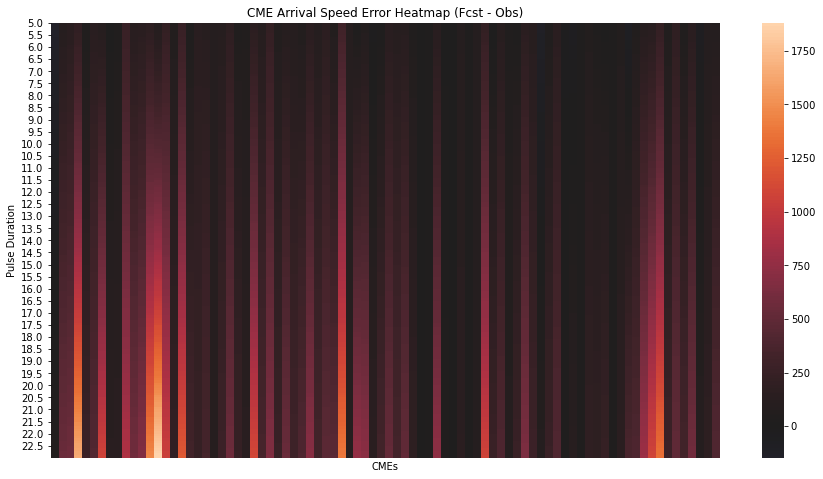

In [12]:
# Set up heatmap
plt.figure(figsize=(15, 8))
ax = sns.heatmap(av_notabs, center=0, xticklabels=False, yticklabels=False, cbar=True)

# Set y-tick positions and labels every 5 intervals
ytick_positions = np.arange(0, len(pulse_durations), 5)
ax.set_yticks(ytick_positions)
ax.set_yticklabels(pulse_durations.iloc[ytick_positions])

# Labels and title
plt.xlabel("CMEs")
plt.ylabel("Pulse Duration")
plt.title("CME Arrival Speed Error Heatmap (Fcst - Obs)")

# Show plot
plt.savefig("as_error_heatmap.pdf")
plt.show()

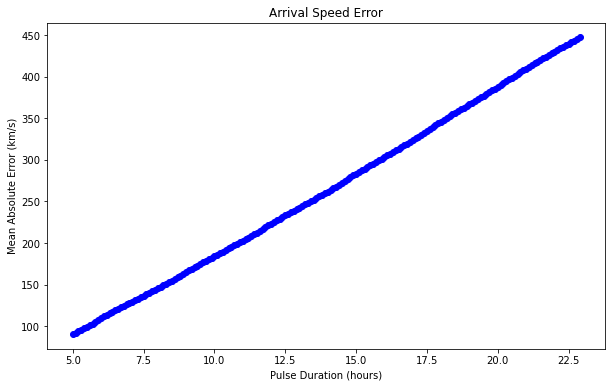

In [13]:
# Plot df_error_avg against pulse_durations
plt.figure(figsize=(10, 6))
plt.plot(pulse_durations, av_mae, marker='o', linestyle='-', color='b')

# Labels and title
plt.xlabel('Pulse Duration (hours)')
plt.ylabel('Mean Absolute Error (km/s)')
plt.title('Arrival Speed Error')

# Show the plot
plt.savefig('as_mae.pdf', format='pdf')
plt.show()

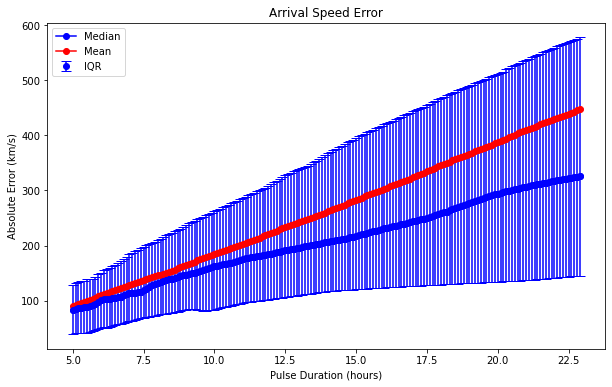

In [17]:
# Plot median values as the main line
plt.figure(figsize=(10, 6))
plt.plot(pulse_durations, av_median, marker='o', linestyle='-', color='b', label='Median')

# Add error bars representing the interquartile range (IQR)
plt.errorbar(pulse_durations, av_median, 
             yerr=[av_median - av_firstq, av_thirdq - av_median],  # Asymmetric error bars
             fmt='o', color='b', capsize=5, label='IQR')

# Add mae for comparison
plt.plot(pulse_durations, av_mae, marker='o', linestyle='-', color='red', label='Mean')

# Labels and title
plt.xlabel('Pulse Duration (hours)')
plt.ylabel('Absolute Error (km/s)')
plt.title('Arrival Speed Error')

# Add a legend
plt.legend()

# Save the plot
plt.savefig('av_median_iqr.pdf', format='pdf')

In [47]:
# Find the index of the minimum median absolute error
min_index = tt_median.idxmin()

# Get the corresponding pulse duration
min_pulse_duration = pulse_durations.loc[min_index]

# Get the minimum median absolute error value
min_median_error = tt_median[min_index]

print(f"Pulse Duration with Minimum Median Absolute Error: {min_pulse_duration} hours")
print(f"Minimum Median Absolute Error: {min_median_error} days")

Pulse Duration with Minimum Median Absolute Error: 10.8 hours
Minimum Median Absolute Error: 0.3045788273680956 days


In [48]:
# Find the index of the minimum median absolute error
min_index = av_median.idxmin()

# Get the corresponding pulse duration
min_pulse_duration = pulse_durations.loc[min_index]

# Get the minimum median absolute error value
min_median_error = av_median[min_index]

print(f"Pulse Duration with Minimum Median Absolute Error: {min_pulse_duration} hours")
print(f"Minimum Median Absolute Error: {min_median_error} km/s")

Pulse Duration with Minimum Median Absolute Error: 5.0 hours
Minimum Median Absolute Error: 83.71561001187962 km/s
